In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import feature
from skimage import morphology
from skimage import segmentation
from skimage import filters
from skimage import color
from skimage import io
from skimage import data
from skimage import exposure

In [3]:
# Load an image
image = io.imread('../datasets/MRI-BRAIN-WITH-CONTRAST-0001.jpeg')

In [4]:
# Convert the image to grayscale
image_gray = color.rgb2gray(image)

In [7]:
# Apply a median filter to the image to reduce noise
image_gray = filters.median(image_gray)

In [8]:
# Apply a threshold to the image to create a binary image
image_binary = image_gray > filters.threshold_otsu(image_gray)

# Apply a morphological opening to the image to remove small objects
image_binary = morphology.binary_opening(image_binary, morphology.disk(5))

# Apply a morphological closing to the image to fill small holes
image_binary = morphology.binary_closing(image_binary, morphology.disk(5))

# Apply a distance transform to the image
distance = ndi.distance_transform_edt(image_binary)

# Apply a local maximum filter to the distance transform
local_maxi = feature.peak_local_max(distance, indices = False, footprint = np.ones((3, 3)), labels = image_binary)

# Apply a connected components analysis to the local maxima
markers = morphology.label(local_maxi)

# Apply the watershed algorithm to the distance transform
labels = segmentation.watershed(-distance, markers, mask = image_binary)

/var/folders/sm/lw2bbffs15g5l3r4ldd25hc00000gn/T/ipykernel_52452/1120025183.py:14: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = feature.peak_local_max(distance, indices = False, footprint = np.ones((3, 3)), labels = image_binary)


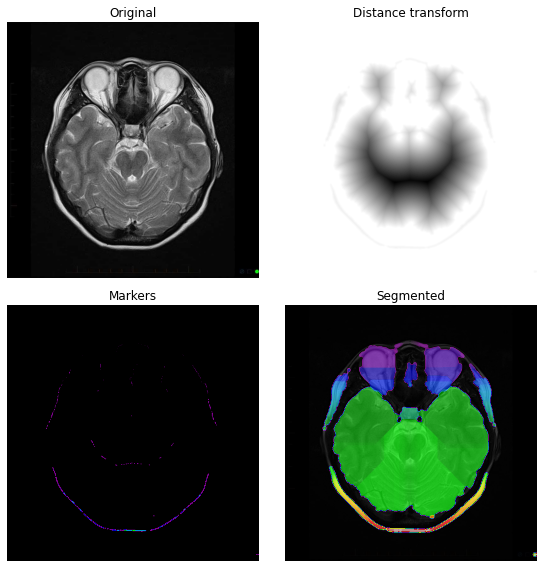

In [9]:
# Display the results
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 8), sharex = True, sharey = True)
ax = axes.ravel()

ax[0].imshow(image, cmap = plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(-distance, cmap = plt.cm.gray)
ax[1].set_title('Distance transform')

ax[2].imshow(markers, cmap = plt.cm.nipy_spectral)
ax[2].set_title('Markers')

ax[3].imshow(image, cmap = plt.cm.gray)
ax[3].imshow(labels, cmap = plt.cm.nipy_spectral, alpha = 0.7)
ax[3].set_title('Segmented')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()